In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('./Data/Final_18_features_extracted_V2.csv')

In [3]:
df.shape

(9059, 20)

So, we have **9059 instances** and **20 Features**

In [4]:
df.head()

,Region,File Name,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,AMP_ENV,RMSE,ZCR,SPEC_CENT,SPEC_BAND
0,Barisal,br1.wav,-371.58478,97.99681,1.269639,26.940123,-5.517467,-7.585458,-12.512117,-10.121937,-17.117098,-2.980860,-5.495219,-6.685885,-2.246712,0.094423,0.042012,0.082185,1389.448490,1475.018042
1,Barisal,br10.wav,-311.64117,71.84370,-20.855787,17.992466,-9.575283,9.301216,-38.153957,-14.808104,-10.210079,-14.747650,-10.387901,-1.234518,-3.261181,0.165459,0.074938,0.179697,2307.459302,1789.181398
2,Barisal,br100.wav,-314.17575,136.41866,-52.862125,-15.473975,-45.570000,-17.382814,-19.885965,-25.647032,-8.209912,-17.986666,-11.351544,-1.021543,-9.109297,0.108455,0.048392,0.070920,1157.114627,1057.426180
3,Barisal,br1000.wav,-411.62485,180.74176,-21.907639,-30.858137,14.736920,-6.635318,-30.891031,-23.473873,-18.243060,-22.557762,-11.455458,0.803584,-9.340458,0.045525,0.023924,0.049118,755.861500,628.356257
4,Barisal,br1001.wav,-395.18910,115.52895,-60.058544,-21.238525,-16.252647,-4.061910,-12.676420,-23.779793,-25.017618,-18.328882,-6.299292,-8.562610,-16.118456,0.043661,0.021089,0.101046,1474.438870,1225.782428


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9059 entries, 0 to 9058
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     9059 non-null   object 
 1   File Name  9059 non-null   object 
 2   MFCC1      9059 non-null   float64
 3   MFCC2      9059 non-null   float64
 4   MFCC3      9059 non-null   float64
 5   MFCC4      9059 non-null   float64
 6   MFCC5      9059 non-null   float64
 7   MFCC6      9059 non-null   float64
 8   MFCC7      9059 non-null   float64
 9   MFCC8      9059 non-null   float64
 10  MFCC9      9059 non-null   float64
 11  MFCC10     9059 non-null   float64
 12  MFCC11     9059 non-null   float64
 13  MFCC12     9059 non-null   float64
 14  MFCC13     9059 non-null   float64
 15  AMP_ENV    9059 non-null   float64
 16  RMSE       9059 non-null   float64
 17  ZCR        9059 non-null   float64
 18  SPEC_CENT  9059 non-null   float64
 19  SPEC_BAND  9059 non-null   float64
dtypes: float

- All of our features and numeric and quantitative! Thats good
- I dont think we need *File Name* Feature, as its kind of indexing! Its better to use default indexing
- Also need to rearrange our features, have to shift *Target: Region* at the end! 
- Might need to encode Region to numerical values as some sklearn module doesnt support *object* values as target 

In [6]:
df.describe()

,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,AMP_ENV,RMSE,ZCR,SPEC_CENT,SPEC_BAND
count,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000,9059.000000
mean,-305.284390,110.093878,-35.487616,17.402976,-22.740510,-3.569898,-20.692163,-6.336551,-17.217627,-6.225708,-7.121869,-6.274459,-2.771004,0.156497,0.070073,0.111793,1713.933136,1522.470786
std,110.289312,32.460392,24.253824,18.322957,16.237710,14.072712,12.587033,9.956454,8.511028,7.778237,6.742249,6.292970,6.943392,0.123555,0.056893,0.052653,541.333743,297.113371
min,-1114.268000,-120.145230,-177.057880,-51.649660,-81.604420,-54.146260,-70.135284,-47.768578,-68.206825,-45.482357,-48.926740,-35.274784,-39.230938,0.000007,0.000002,0.028155,372.250915,309.180144
25%,-379.339505,92.354972,-51.127550,5.127942,-33.669491,-13.143737,-28.654498,-12.907609,-22.710344,-11.555525,-11.372157,-10.037427,-7.140916,0.061343,0.026874,0.078832,1339.872744,1331.286878
50%,-297.819030,111.782230,-35.275790,17.992466,-22.812662,-4.014559,-20.284172,-6.322949,-16.924881,-6.312454,-7.088372,-6.125471,-2.726602,0.116483,0.051462,0.099188,1636.953304,1519.554971
75%,-225.439905,131.279950,-19.442580,30.294767,-11.735101,6.384354,-12.201618,0.555661,-11.476792,-1.123997,-2.898087,-2.389063,1.748387,0.223615,0.098267,0.127461,1961.150199,1717.749868
max,-42.360540,228.703160,79.457920,102.975730,48.967484,72.796196,30.695570,41.961887,36.002052,44.805010,25.183481,23.378464,41.773920,0.795998,0.444757,0.558789,5825.950431,2770.477398


- Also, I have just noticed, theres no missing values! NICE!

In [7]:
df.describe(include="object")

,Region,File Name
count,9059,9059
unique,9,9059
top,Formal,br1.wav
freq,1408,1


In [8]:
df["Region"].value_counts()

Formal        1408
Barisal       1257
Noakhali      1213
Mymensingh    1053
Sylhet         958
Rajshahi       860
Chittagong     797
Dhaka          763
Khulna         750
Name: Region, dtype: int64

- Alright, so our classes arent uniformly distributed! **Remember to stratify** while modeling!
- **NEED TO RANDOMIZE THE DATASET**

In [29]:
Formal = df[df["Region"]=="Formal"][df.columns].mean()
Barisal = df[df["Region"]=="Barisal"][df.columns].mean()
Noakhali = df[df["Region"]=="Noakhali"][df.columns].mean()
Mymensingh = df[df["Region"]=="Mymensingh"][df.columns].mean()
Sylhet = df[df["Region"]=="Sylhet"][df.columns].mean()
Rajshahi = df[df["Region"]=="Rajshahi"][df.columns].mean()
Chittagong = df[df["Region"]=="Chittagong"][df.columns].mean()
Dhaka = df[df["Region"]=="Dhaka"][df.columns].mean()
Khula = df[df["Region"]=="Khula"][df.columns].mean()

<AxesSubplot:>

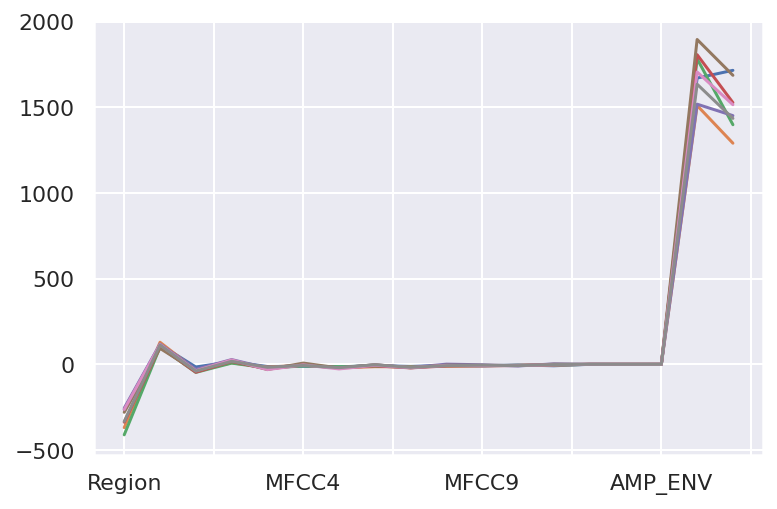

In [44]:
Formal.plot()
Barisal.plot()
Noakhali.plot()
Mymensingh.plot()
Sylhet.plot()
Rajshahi.plot()
Chittagong.plot()
Dhaka.plot()
Khula.plot()

### Observations:
- Theres clear distinction in mean feature values!
- LETS ZOOM IN A BIT!

<AxesSubplot:xlabel='Region'>

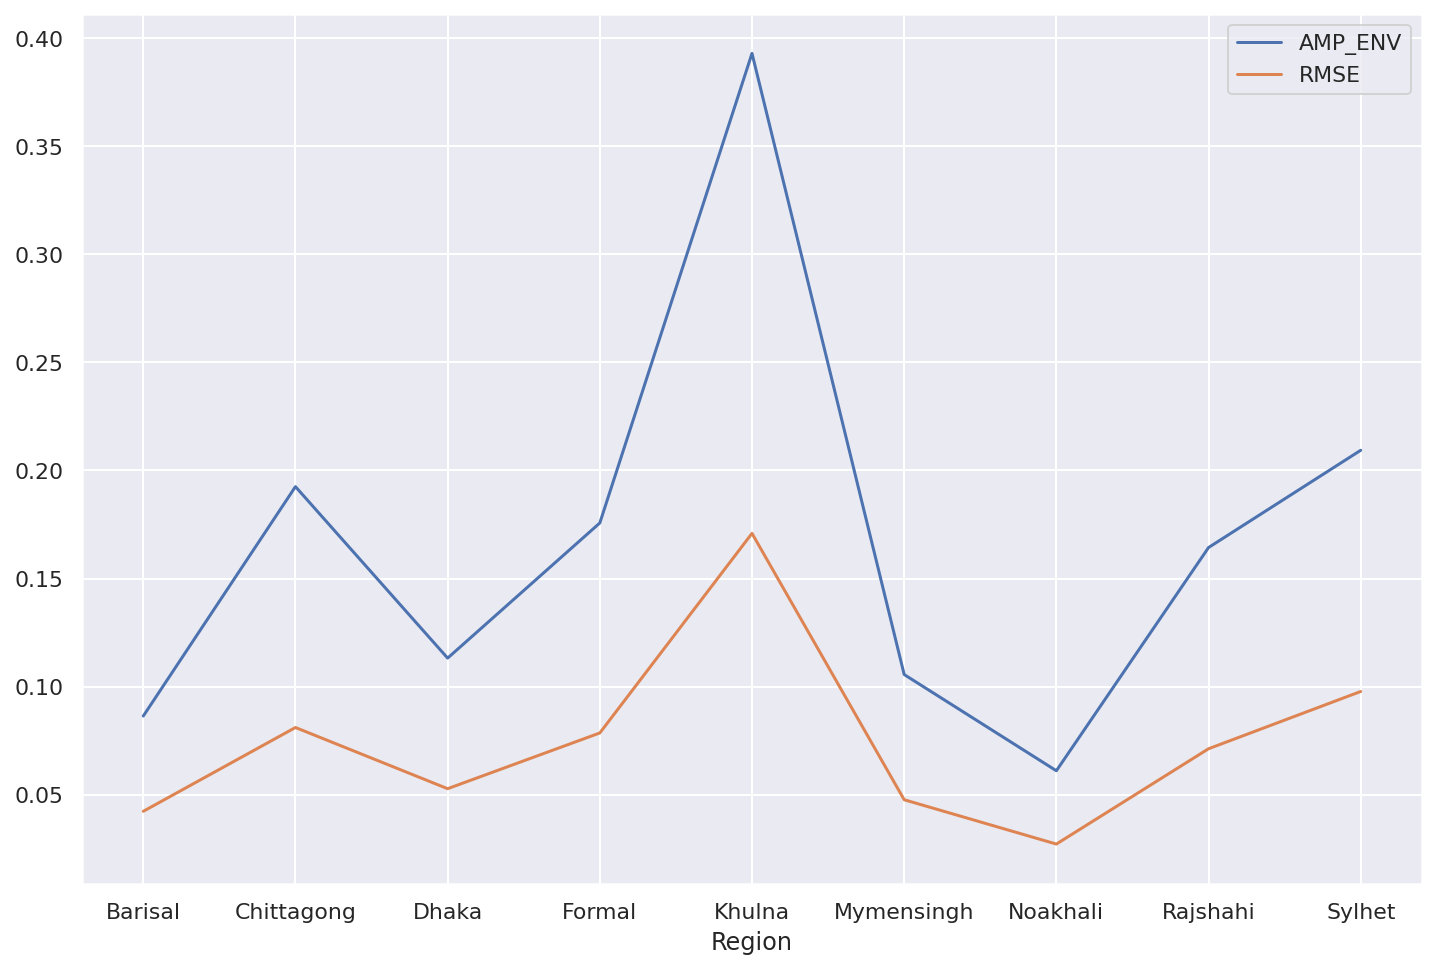

In [67]:
df.groupby(by="Region")['AMP_ENV', 'RMSE']\
    .mean().plot(figsize=(12,8))

<AxesSubplot:xlabel='Region'>

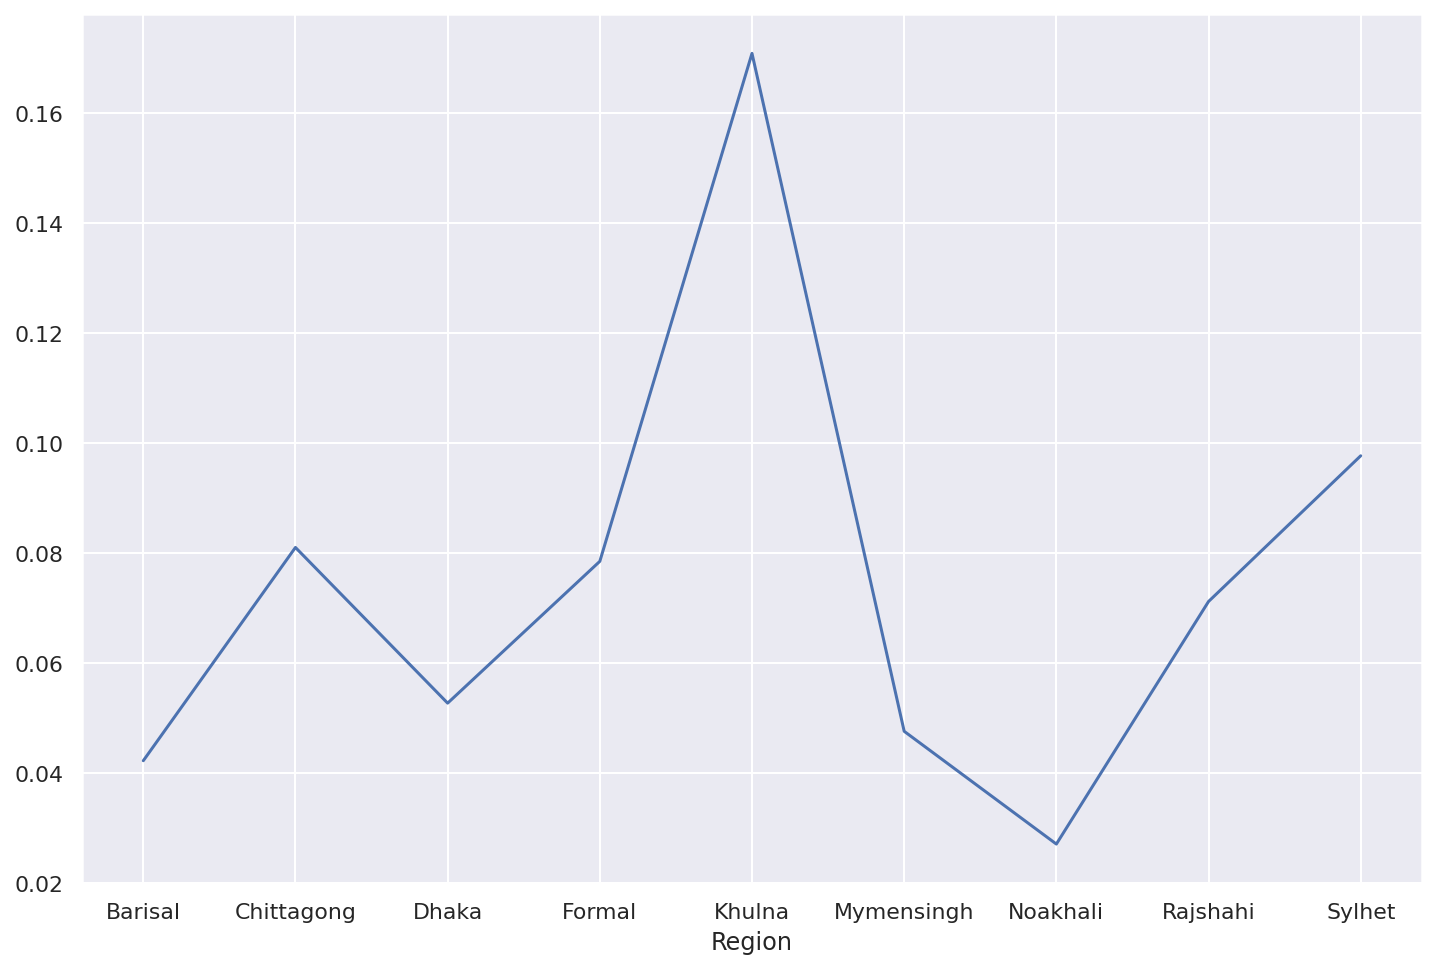

In [70]:
df.groupby(by="Region")['RMSE']\
    .mean().plot(figsize=(12,8))

<AxesSubplot:xlabel='Region'>

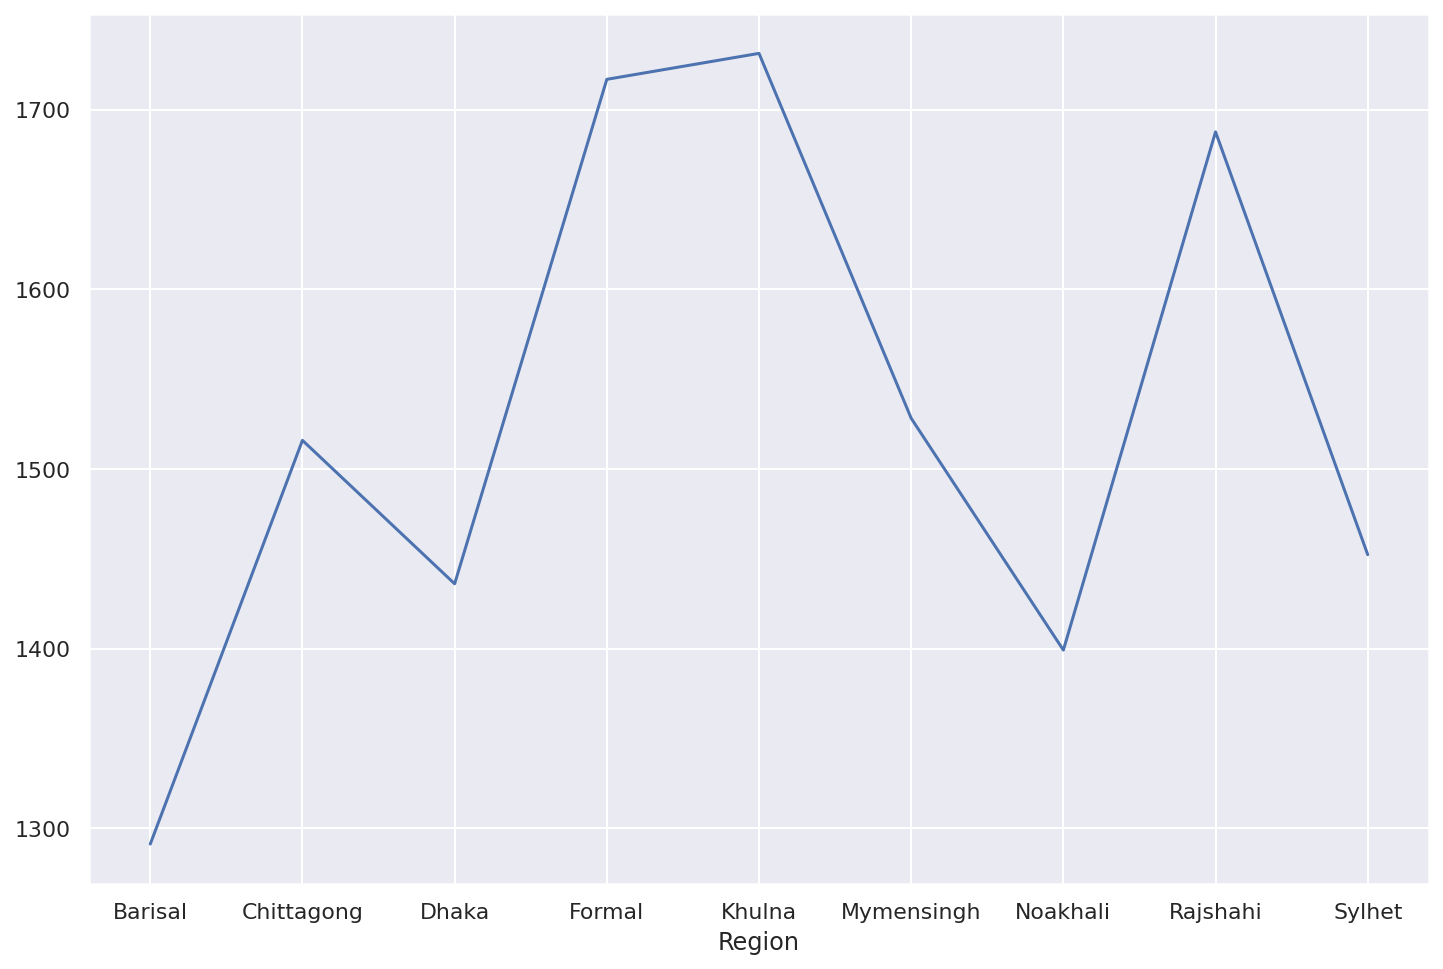

In [71]:
df.groupby(by="Region")['SPEC_BAND']\
    .mean().plot(figsize=(12,8))

<AxesSubplot:xlabel='Region'>

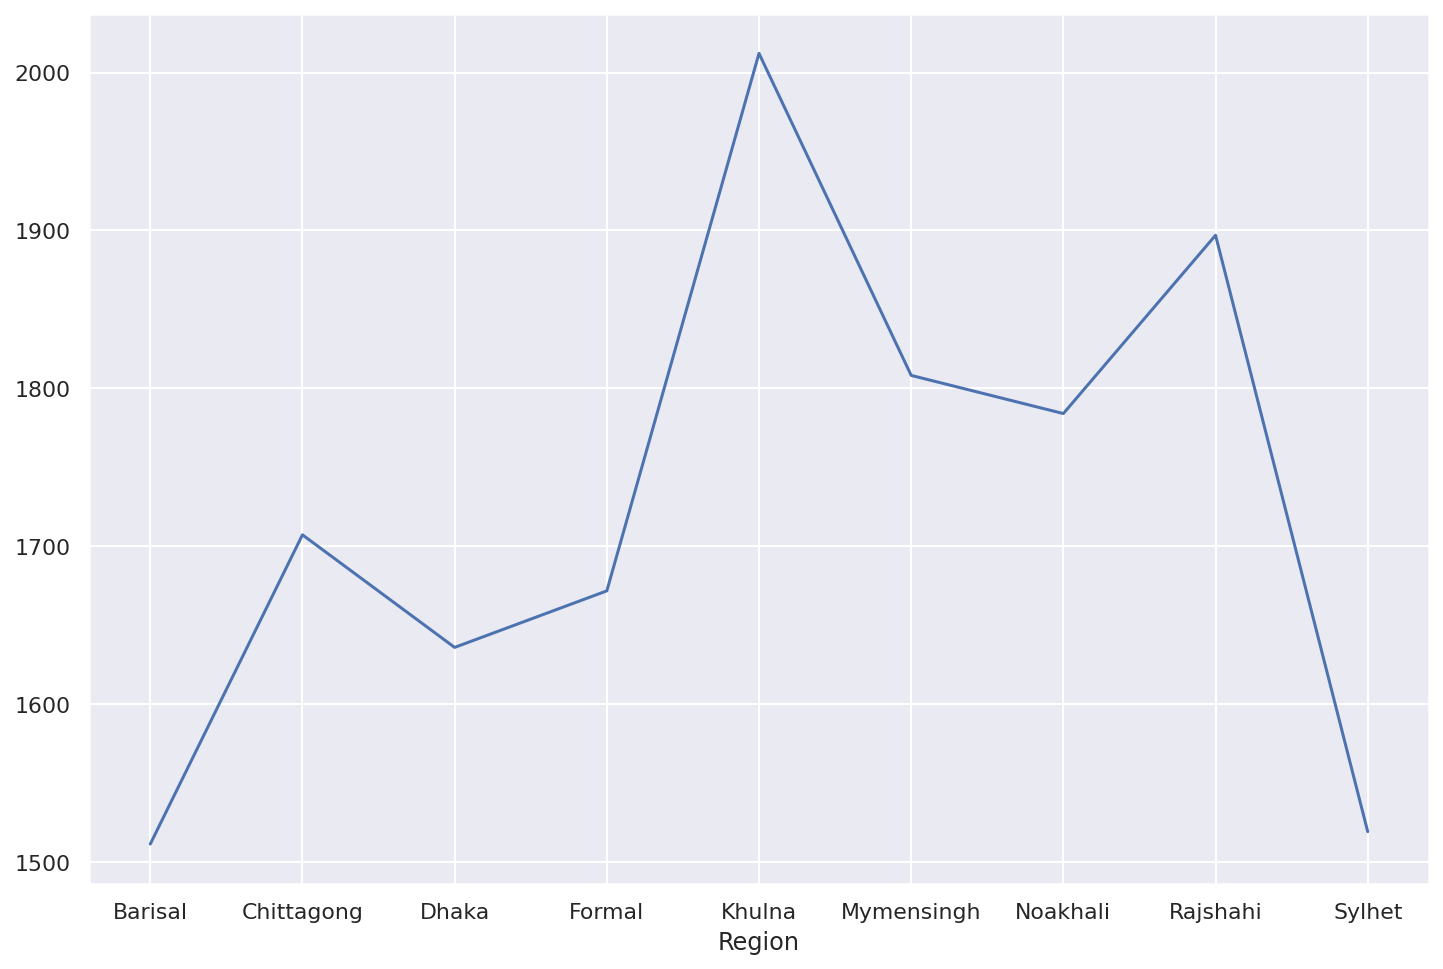

In [72]:
df.groupby(by="Region")['SPEC_CENT']\
    .mean().plot(figsize=(12,8))

<AxesSubplot:xlabel='Region'>

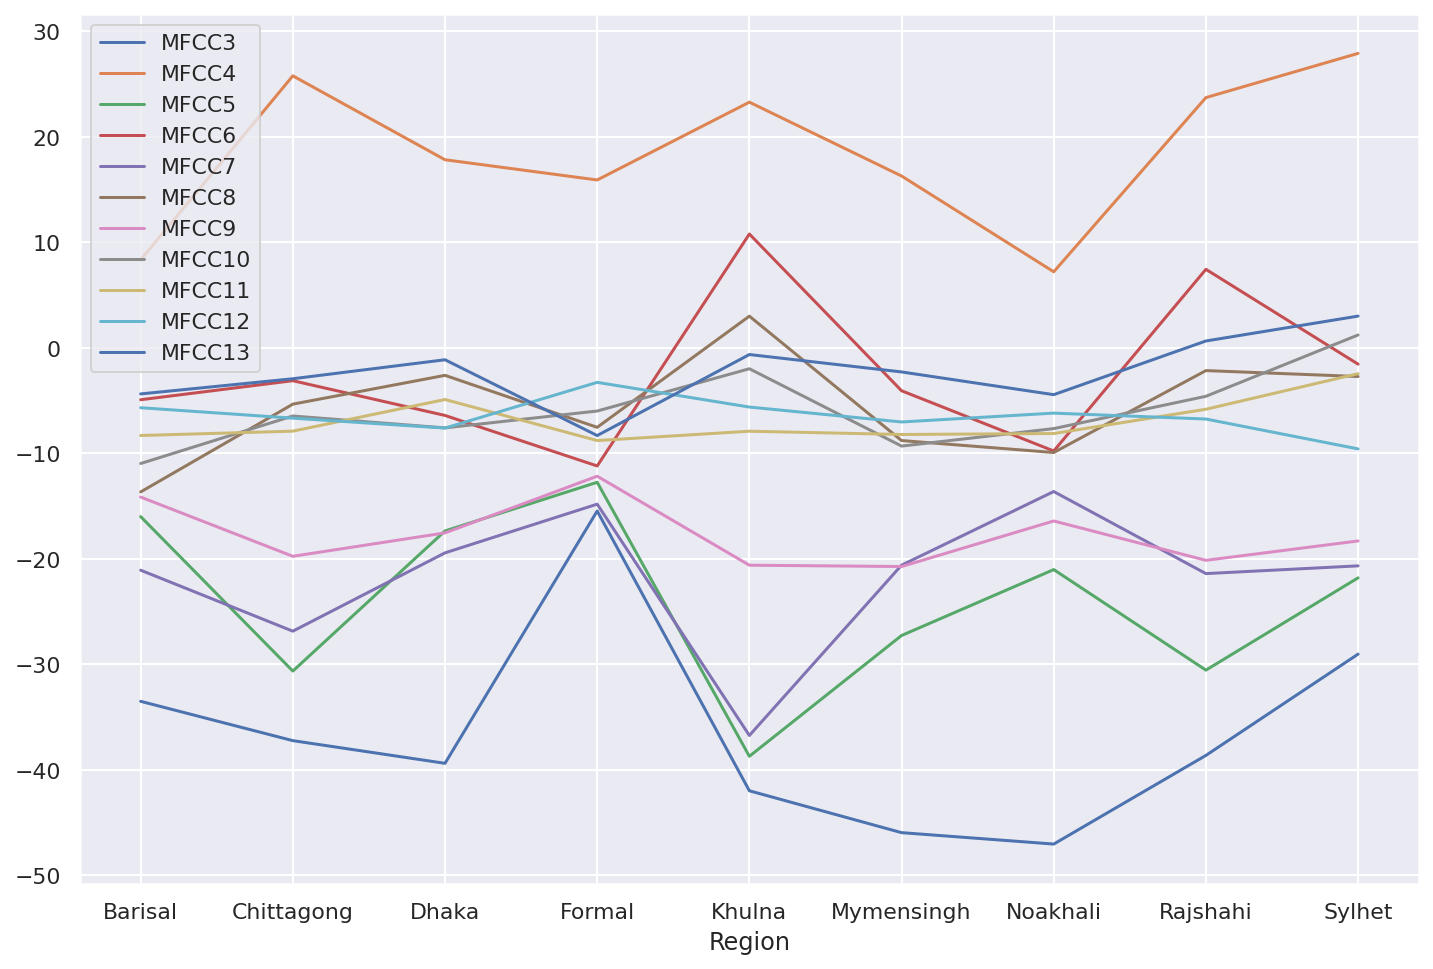

In [75]:
df.groupby(by="Region")['MFCC3', 'MFCC4', 'MFCC5',
       'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12',
       'MFCC13']\
    .mean().plot(figsize=(12,8))

## Correlation between features

<AxesSubplot:>

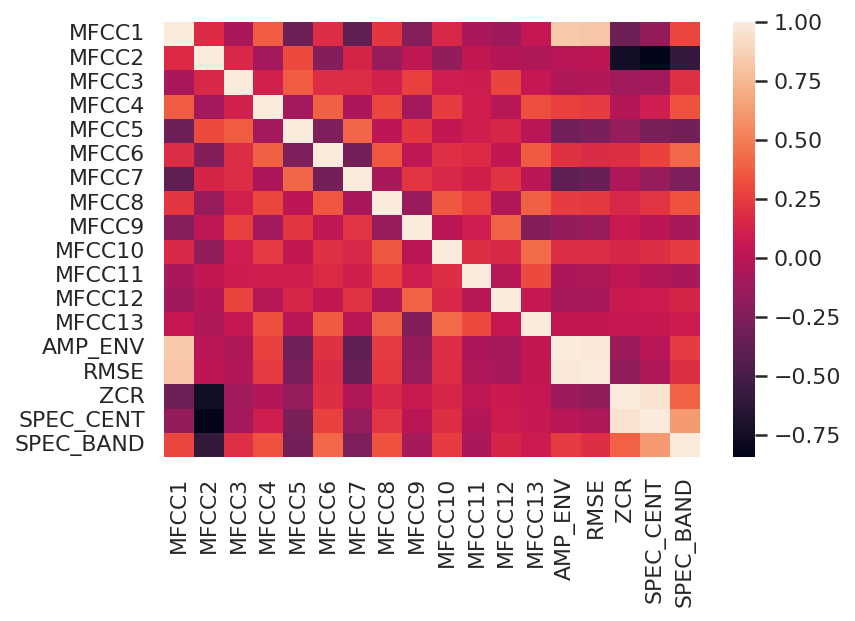

In [80]:
corr_matrix = df[['MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5',
       'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12',
       'MFCC13', 'AMP_ENV', 'RMSE', 'ZCR', 'SPEC_CENT', 'SPEC_BAND']].corr()

sns.heatmap(corr_matrix)

**1. Why theres high corr between mfcc1 AMP_ENV and ZCR**
- Gotta figure that out!

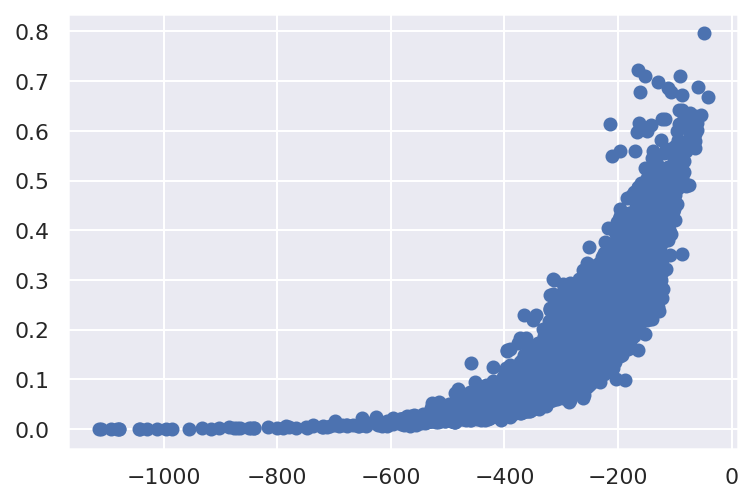

In [81]:
plt.scatter(df['MFCC1'],df['AMP_ENV'])

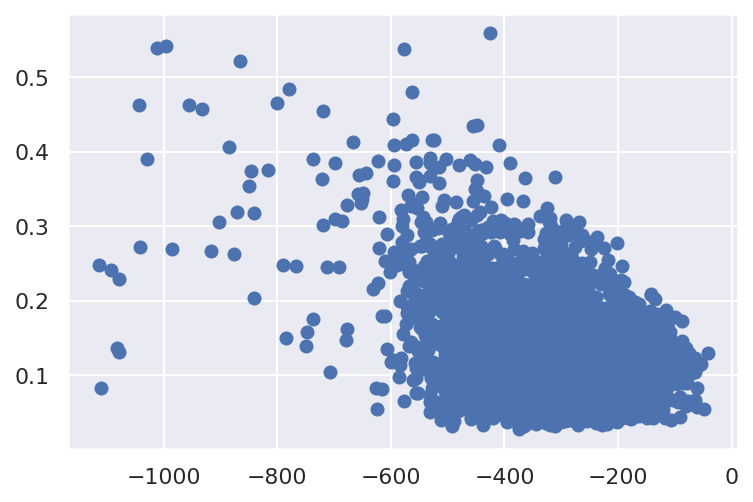

In [82]:
plt.scatter(df['MFCC1'],df['ZCR'])

**Havent done any scaling of the feature**